In [7]:
import pandas as pd
import numpy as np

# for Box-Cox Transformation
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt

# read in all our data
df = pd.read_csv("//Users//vanshpahwa//Downloads//RM.AI.TASK1.CSV")

# set seed for reproducibility
np.random.seed(0)
df

/var/folders/0w/4d7v1n1s7wd7n4dnv5f69jbh0000gn/T/ipykernel_56816/2412566687.py:15: DtypeWarning: Columns (25,51) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("//Users//vanshpahwa//Downloads//RM.AI.TASK1.CSV")


,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2009-09-10,2009091000,1,1,NaN,15:00,15,3600.0,0.0,TEN,...,NaN,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,NaN,NaN,2009
1,2009-09-10,2009091000,1,1,1.0,14:53,15,3593.0,7.0,PIT,...,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,2009-09-10,2009091000,1,1,2.0,14:16,15,3556.0,37.0,PIT,...,NaN,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,NaN,NaN,2009
3,2009-09-10,2009091000,1,1,3.0,13:35,14,3515.0,41.0,PIT,...,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2009-09-10,2009091000,1,1,4.0,13:27,14,3507.0,8.0,PIT,...,NaN,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,NaN,NaN,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407683,2017-12-31,2017123101,29,4,NaN,00:28,1,28.0,4.0,BAL,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,2017
407684,2017-12-31,2017123101,29,4,3.0,00:28,1,28.0,0.0,BAL,...,-0.397515,0.080409,0.919591,0.050478,0.949522,0.080409,-0.029931,-0.021795,-0.008136,2017
407685,2017-12-31,2017123101,29,4,4.0,00:24,1,24.0,4.0,BAL,...,2.457114,0.050478,0.949522,0.030881,0.969119,0.050478,-0.019597,-0.030603,0.011006,2017
407686,2017-12-31,2017123101,30,4,1.0,00:14,1,14.0,10.0,BAL,...,NaN,0.030881,0.969119,0.000000,1.000000,0.969119,0.030881,NaN,NaN,2017


<Axes: ylabel='Count'>

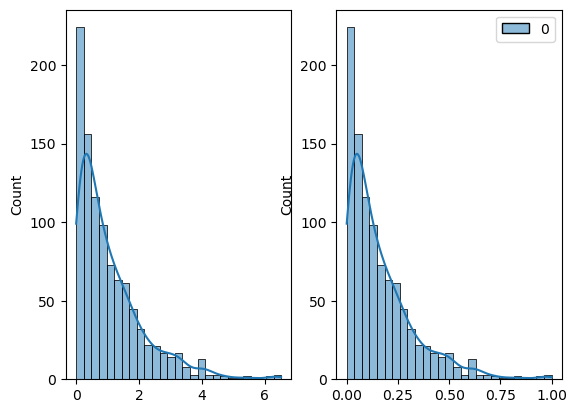

In [11]:
# generate 1000 data points randomly drawn from an exponential distribution
original_data = np.random.exponential(size = 1000)
# takes any 1000 random dsta points from the data representing exponential distribution

# mix-max scale the data between 0 and 1
scaled_data = minmax_scaling(original_data, columns = [0]) 
#scales the values of the original data between 0 and 1 using min max scaling 
#formula in notebook


# plot both together to compare
fig, ax=plt.subplots(1,2)
#creates a subplot with 1 row and 2 columns
ax[0] means left subplot
ax[1] means right subplot

#seborne's distplot to visualize the data


#distplot is depreciated now on so use histplot
# sns.distplot(original_data, ax=ax[0]) #Plots the distribution of original_data on the first subplot (ax[0]) using Seaborn’s distplot function.
# ax[0].set_title("Original Data")
# sns.distplot(scaled_data, ax=ax[1])
# ax[1].set_title("Scaled data")
sns.histplot(original_data, kde=True, ax=ax[0])
sns.histplot(scaled_data, kde=True, ax=ax[1])

In [13]:
#normalization

Text(0.5, 1.0, 'Normalized data')

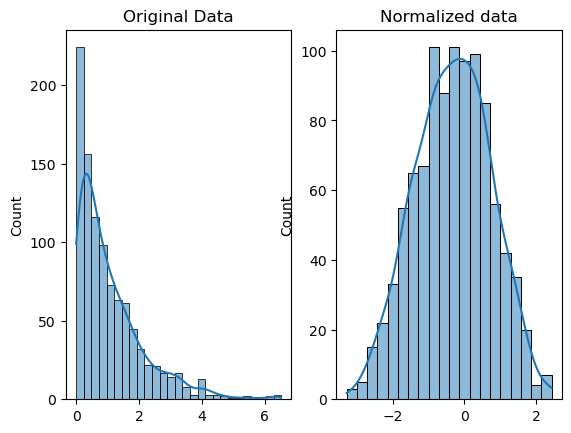

In [21]:
# normalize the exponential data with boxcox
normalized_data = stats.boxcox(original_data)
#applies boxcox transformation to original data
# ie to make data similar to a bellshaped curve

#particular formula

# plot both together to compare
fig, ax=plt.subplots(1,2)
# sns.distplot(original_data, ax=ax[0])
# ax[0].set_title("Original Data")
# sns.distplot(normalized_data[0], ax=ax[1])
# ax[1].set_title("Normalized data")
sns.histplot(original_data, kde=True, ax=ax[0])
ax[0].set_title("Original Data")
sns.histplot(normalized_data[0], kde=True, ax=ax[1])
ax[1].set_title("Normalized data")
#why use this-
#Exponential distributions or long-tailed data become more manageable after transformation.